In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import folium
from folium.plugins import HeatMap

In [123]:
df = pd.read_csv('house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [124]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,N,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,N,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,N,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,N,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,N,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [125]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [126]:

duplicates = df.duplicated().sum()
rem_duplicates = df.drop_duplicates(inplace=True)
print(f'Total duplicates: {duplicates}')

Total duplicates: 0


In [127]:
null_values = df.isnull().sum()
null = df.dropna(inplace=True)

print(null_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [128]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [129]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                object
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [130]:
df['price'] = df['price'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['waterfront'] = df['waterfront'].astype(str)
df['lat'] = df['lat'].astype(int)
df['long'] = df['long'].astype(int)

In [131]:
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront               object
view                      int64
condition                object
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                       int64
long                      int64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  object        
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [133]:
df['waterfront'] = df['waterfront'].map({'N': 0, 'Y': 1})
print(df['waterfront'])

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64


In [134]:
df['house_age'] = 2025 - df['yr_built']

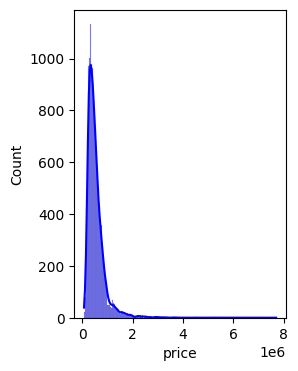

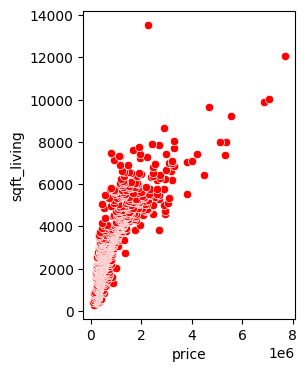

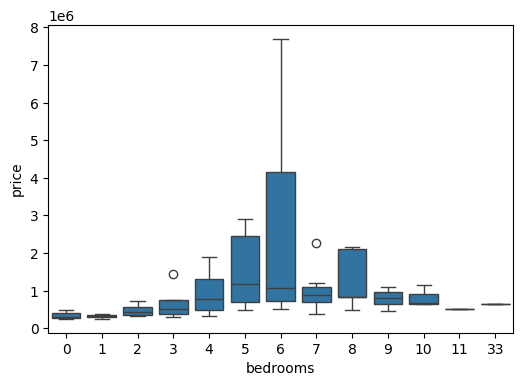

<Figure size 600x400 with 0 Axes>

In [150]:
plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', color='blue', kde=True)
plt.show()

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 2)
sqft_price = df.groupby('sqft_living')['price'].mean().reset_index()
sns.scatterplot(data=sqft_price, x='price', y='sqft_living', color='r')
plt.show()

plt.figure(figsize=(6,4))
num_bed = df.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()
sns.boxplot(data=num_bed, x='bedrooms', y='price')
plt.show()

plt.figure(figsize=(6,4))
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)
heat_data = [[row['lat'], row['long']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m



In [136]:
df.columns = df.columns.str.strip()
df.price

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

Linear Regression R² Score: 0.024866987756907766


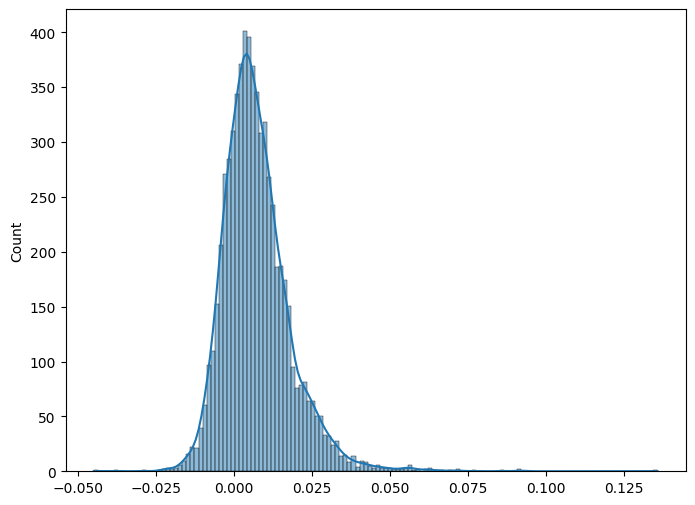

In [144]:
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'zipcode']]  # Features
y = df['waterfront']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("Linear Regression R² Score:", r2)

plt.figure(figsize=(8, 6))

sns.histplot(y_pred, kde=True)
plt.show()